# Mounting Google Drive in Colab

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

# Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sms

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# import sys
#!{sys.executable} -m pip install imblearn

# Data Import

In [5]:
df=pd.read_csv('C:/Users/Abhishek/diabetic_data.csv')

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,age_bin,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),2,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),3,?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),4,?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),5,?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Correlation Matrix**

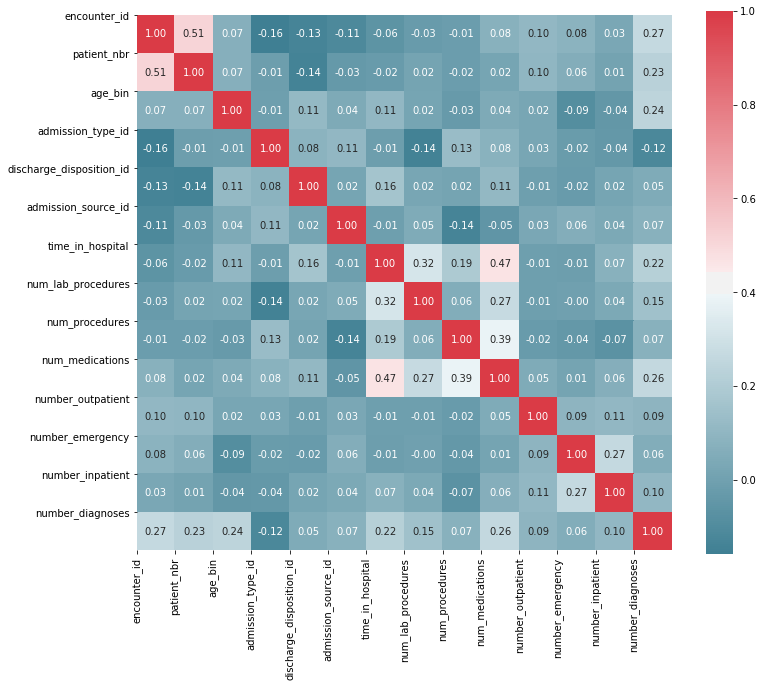

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", square=True)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Data Preprocessing

In [8]:
df=df.replace('?',np.NaN)

**Processing Age column**

In [9]:
df['age']=df['age'].str.strip(')[')

**Dropping less important features**

In [10]:
df.drop(['encounter_id','patient_nbr','weight','payer_code',
         'medical_specialty','diag_1','diag_2','diag_3','acetohexamide',
         'tolbutamide','acarbose','miglitol','troglitazone','tolazamide',
        'examide','citoglipton','glyburide-metformin',
        'glipizide-metformin','glimepiride-pioglitazone',
        'metformin-rosiglitazone','metformin-pioglitazone',
        'nateglinide','chlorpropamide','age'],axis=1,inplace=True)

**Processing Gender column**

In [11]:
df['gender'].replace('Unknown/Invalid',np.NaN,inplace=True)

In [12]:
df.isna().sum()

race                        2273
gender                         3
age_bin                        0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
glimepiride                    0
glipizide                      0
glyburide                      0
pioglitazone                   0
rosiglitazone                  0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

**Processing Race column**

In [13]:
df['race'].fillna('Caucasian',inplace=True)

** Dropping any NA values**

In [14]:
df.dropna(axis=0,inplace=True)

**Converting features to binary**

In [15]:
df.change.replace('Ch', 1, inplace=True)
df.change.replace('No', 0, inplace=True)

In [16]:
df.diabetesMed.replace('Yes', 1, inplace=True)
df.diabetesMed.replace('No', 0, inplace=True)

In [17]:
df.readmitted.replace('>30', 'Yes', inplace=True)
df.readmitted.replace('<30', 'Yes', inplace=True)

# EDA

In [18]:
readmitted_notcured=df[(df['readmitted']=='>30')|(df['readmitted']=='<30')]
readmitted_cured=df[(df['readmitted']=='NO')]

In [19]:
df.columns

Index(['race', 'gender', 'age_bin', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

**Patients grouped by Gender and Age**

In [20]:
#readmitted_notcured.groupby(['gender','age'])['readmitted'].count().unstack().plot(kind='bar', figsize=(12,8), title='Not Cured Patients')

In [21]:
#readmitted_cured.groupby(['gender','age'])['readmitted'].count().unstack().plot(kind='bar', figsize=(12,8), title='Cured Patients')

**Patients grouped by Number of days spent in hospital**

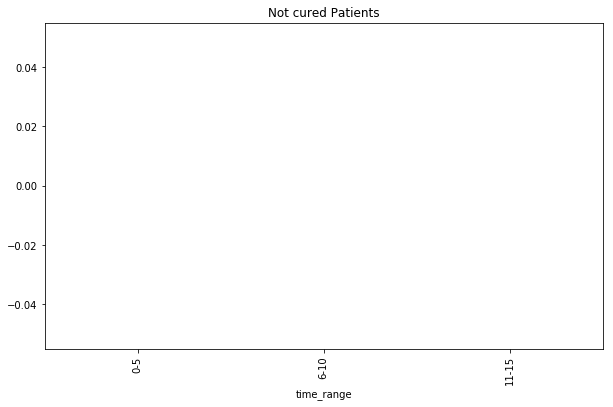

In [22]:
bins=[0,5,10,15]
time=['0-5','6-10','11-15']
readmitted_notcured['time_range']=pd.cut(readmitted_notcured.time_in_hospital,bins,labels=time)
readmitted_notcured.groupby(readmitted_notcured['time_range'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Not cured Patients')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


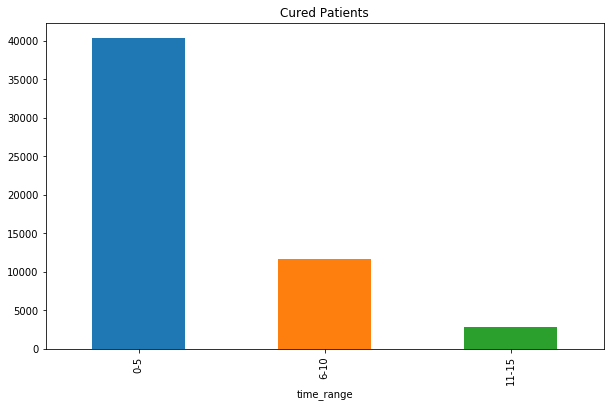

In [23]:
bins=[0,5,10,15]
time=['0-5','6-10','11-15']
readmitted_cured['time_range']=pd.cut(readmitted_cured.time_in_hospital,bins,labels=time)
readmitted_cured.groupby(readmitted_cured['time_range'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Cured Patients')

** Patients grouped by Number of Lab Procedures performed**

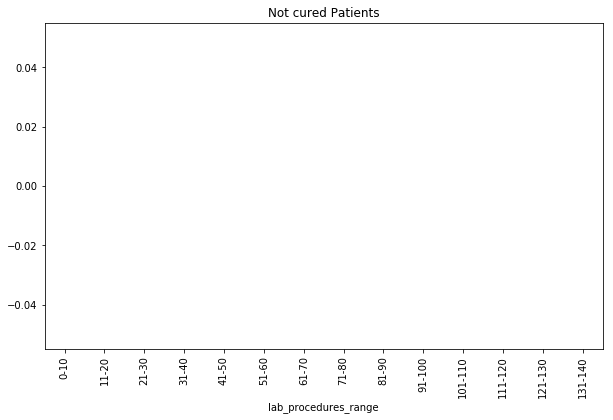

In [24]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
count=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120','121-130','131-140']
readmitted_notcured['lab_procedures_range']=pd.cut(readmitted_notcured.num_lab_procedures,bins,labels=count)
readmitted_notcured.groupby(readmitted_notcured['lab_procedures_range'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Not cured Patients')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


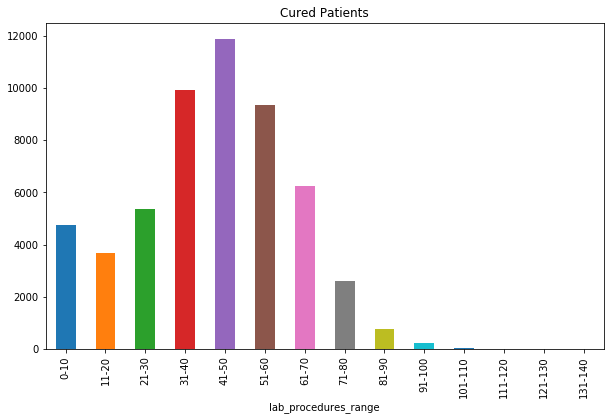

In [25]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
count=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120','121-130','131-140']
readmitted_cured['lab_procedures_range']=pd.cut(readmitted_cured.num_lab_procedures,bins,labels=count)
readmitted_cured.groupby(readmitted_cured['lab_procedures_range'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Cured Patients')

** Patient if cured after changing medicine **

In [26]:
#readmitted_notcured.groupby(readmitted_notcured['change'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Not cured Patients')

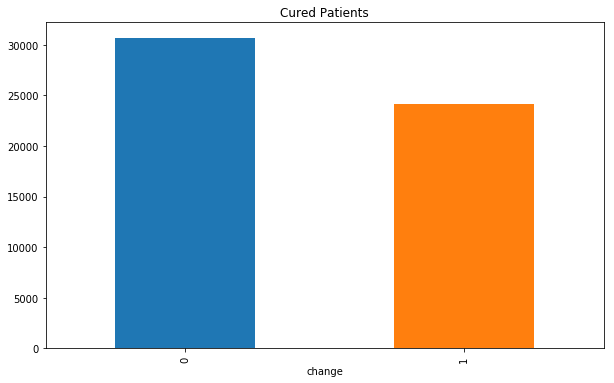

In [27]:
readmitted_cured.groupby(readmitted_cured['change'])['readmitted'].count().plot(kind='bar', figsize=(10,6), title='Cured Patients')

# Model Building

In [28]:
y = df.pop('readmitted')

**One Hot Encoding Categorical features**

In [29]:
cats = df.select_dtypes(include='object')
nums = df.select_dtypes(include='number')

In [30]:
#cats = pd.get_dummies(cats, dtype='int')
#from sklearn.preprocessing import LabelEncoder

#for i in cats.columns:
   # encoder=LabelEncoder()
    #t=encoder.fit_transform(cats[i])
    #cats[i] = t

In [31]:
cat = pd.get_dummies(cats,dtype='int')
n_df = pd.concat([cat,nums],axis=1)
n_df.shape

(101763, 61)

In [32]:
cat

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,...,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
8,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
9,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


**Splitting Data**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(n_df, y, test_size=0.2, 
                                                    random_state=0, stratify=y)

**Building Model**

In [34]:
#model = RandomForestClassifier(random_state=0)
#model.fit(X_train,y_train)
len(df.columns)

26

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
model=GradientBoostingClassifier(learning_rate=0.5,n_estimators=120)
#model=XGBClassifier(learning_rate=0.3,n_estimators=150)
#model=DecisionTreeClassifier()
#model=RandomForestClassifier(max_depth=2,n_estimators=10)
#model=LogisticRegression()
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

**Checking feature importance**

In [36]:
pd.DataFrame({'cols':X_train.columns, 'Imp':model.feature_importances_.round(4)})

,cols,Imp
0,race_AfricanAmerican,0.0063
1,race_Asian,0.0043
2,race_Caucasian,0.0101
3,race_Hispanic,0.0113
4,race_Other,0.0022
5,gender_Female,0.0040
6,gender_Male,0.0043
7,max_glu_serum_>200,0.0048
8,max_glu_serum_>300,0.0042
9,max_glu_serum_None,0.0012


# Predictions

In [91]:
y_pred = model.predict(X_test)

# Performance Metrics

**Model Accuracy**

In [92]:
model.score(X_train, y_train)*100

65.81255374032673

In [93]:
model.score(X_test,y_test)*100

64.67842578489658

**Precision and Recall**

In [94]:
print(sms.classification_report(y_test, y_pred))




             precision    recall  f1-score   support

         NO       0.65      0.73      0.69     10972
        Yes       0.64      0.55      0.59      9381

avg / total       0.65      0.65      0.64     20353



**Plotting ROC Curves**

In [41]:
#!pip install scikit-plot
from scikitplot.metrics import plot_roc_curve 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


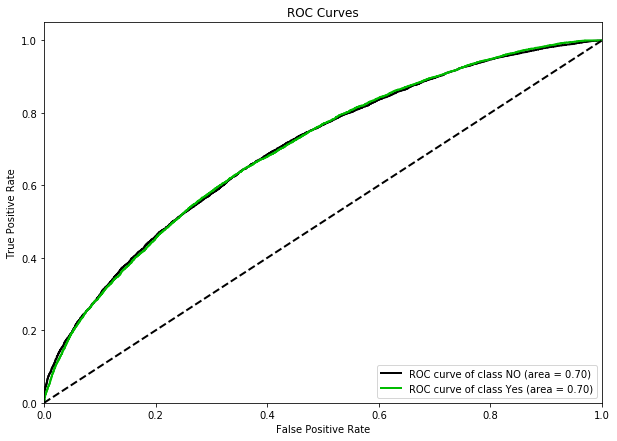

In [95]:
y_pred_probs = model.predict_proba(X_test)
plot_roc_curve(y_test, y_pred_probs, curves=['each_class'], figsize=(10,7))
plt.show()